# Notebook para analises exploratorio de los datos

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
# From the repository of the dataset, we import the function that
# loads the fluorescence dataset
from src.load_dataset import load_fluorescence

In [2]:
fluorescence = load_fluorescence('data',as_frame=True)
df = fluorescence.frame
df['label_name'] = df.label.replace(fluorescence.label_map)
df['diet_name'] = df.diet.replace(fluorescence.diet_map)

/var/folders/9x/sk5wzh9n465bsgp0vntddj3w0000gn/T/ipykernel_20501/514215656.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['label_name'] = df.label.replace(fluorescence.label_map)
/var/folders/9x/sk5wzh9n465bsgp0vntddj3w0000gn/T/ipykernel_20501/514215656.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['diet_name'] = df.diet.replace(fluorescence.diet_map)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175211 entries, 0 to 175210
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   diet        175211 non-null  category
 1   mouse       175211 non-null  int64   
 2   take        175211 non-null  int64   
 3   row         175211 non-null  int64   
 4   col         175211 non-null  int64   
 5   Ca          175211 non-null  float64 
 6   Cu          175211 non-null  float64 
 7   Fe          175211 non-null  float64 
 8   K           175211 non-null  float64 
 9   Mn          175211 non-null  float64 
 10  P           175211 non-null  float64 
 11  S           175211 non-null  float64 
 12  Zn          175211 non-null  float64 
 13  label       23003 non-null   category
 14  label_name  23003 non-null   category
 15  diet_name   175211 non-null  category
dtypes: category(4), float64(8), int64(4)
memory usage: 16.7 MB


In [4]:
# Estadísticas descriptivas del dataframe de cada columna
df.describe()

,mouse,take,row,col,Ca,Cu,Fe,K,Mn,P,S,Zn
count,175211.000000,175211.000000,175211.000000,175211.000000,1.752110e+05,1.752110e+05,1.752110e+05,1.752110e+05,1.752110e+05,1.752110e+05,1.752110e+05,1.752110e+05
mean,17.427559,0.106540,41.100741,40.680973,1.375511e+09,7.559693e+06,1.300203e+08,7.021223e+06,2.011924e+07,6.744482e+06,2.738555e+07,6.989112e+07
std,11.459746,0.308529,28.058009,28.110678,1.504605e+09,9.586318e+06,1.804093e+08,1.617595e+07,3.362677e+07,1.659421e+07,4.814614e+07,9.473747e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.000000,0.000000,18.000000,18.000000,5.184645e+08,5.164515e+05,4.481730e+07,0.000000e+00,4.684340e+06,0.000000e+00,0.000000e+00,2.482850e+07
50%,15.000000,0.000000,37.000000,36.000000,8.743000e+08,5.114860e+06,7.804350e+07,0.000000e+00,1.026760e+07,0.000000e+00,1.277800e+07,4.565720e+07
75%,28.000000,0.000000,61.000000,60.000000,1.653060e+09,1.061500e+07,1.295140e+08,8.618140e+06,1.793230e+07,7.250180e+06,3.291800e+07,7.712515e+07
max,39.000000,1.000000,117.000000,120.000000,1.159470e+10,1.778380e+08,6.922760e+09,4.589360e+08,2.994300e+08,3.002360e+08,6.180620e+08,1.513270e+09


In [5]:
# Datos únicos por columna
a=df['take'].unique()
print(f'numero de dietas unicas: {df.diet_name.unique()}')
print(f'numero de ratones unicos: {df.mouse.unique()}')
print(f'numero de tomas unicas: {a}')
print(f'numero de etiquetas unicas: {df.label_name.unique()}')

numero de dietas unicas: ['omega6', 'control', 'omega3']
Categories (3, object): ['control', 'omega3', 'omega6']
numero de ratones unicos: [25 14 19 15 23 16 20 17 18 26 21  2 12  9  8  4 10  7  1 11  6 32 28 29
 33 36 38 35 39 37 30 31 27]
numero de tomas unicas: [0 1]
numero de etiquetas unicas: [NaN, 'no sample', 'no label', 'tumoral B', 'tumoral A', ..., 'blood', 'artifacts', 'dense connective tissue', 'tumoral C', 'paraffin']
Length: 11
Categories (10, object): ['no label', 'tumoral A', 'tumoral B', 'tumoral C', ..., 'loose connective tissue', 'no sample', 'dense connective tissue', 'paraffin']


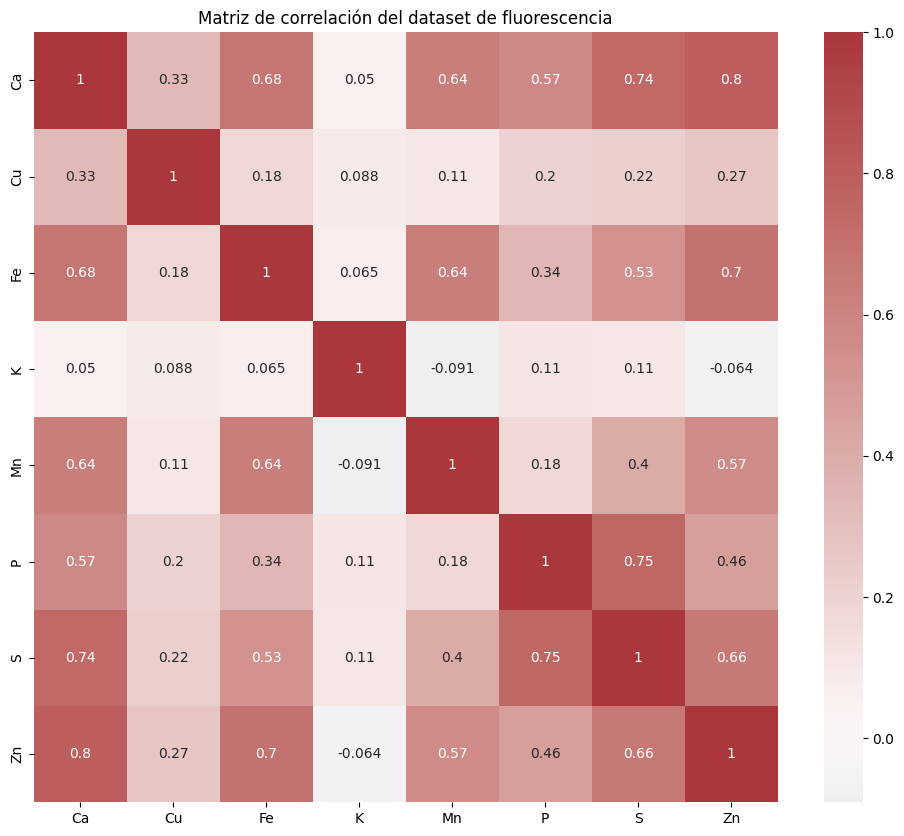

In [6]:
# Matriz de correlación considerando las variables de interés y la etiqueta 'label'
correlation_matrix = df[['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="vlag", center=0)
plt.title('Matriz de correlación del dataset de fluorescencia')
plt.show()


Podemos notar que existe una correlación lineal entre algunas de las fluorescencia de los elementos quimicos, siendo la mayor la correlacion entre Ca y Zn.

In [7]:
#correlation_with_target = df[['diet', 'Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn']].corr()['diet'].sort_values(ascending=False)
#print("Coeficientes de correlación con la variable objetivo:")
#print(correlation_with_target)

In [58]:
# Gráfico de dispersión de las variables de interés
#plt.figure(figsize=(12, 8))
#sns.pairplot(data=df[['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn']])

In [ ]:
df_interesting= df[['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn','label']].copy()
#df_interesting[df_interesting==0].count(axis=0)

Ca           18
Cu        40210
Fe          783
K        119257
Mn        22779
P        102985
S         57251
Zn        11770
label     10102
dtype: int64

In [ ]:
#df_interesting[df_interesting==None].count(axis=0)

Ca       0
Cu       0
Fe       0
K        0
Mn       0
P        0
S        0
Zn       0
label    0
dtype: int64

<Axes: >

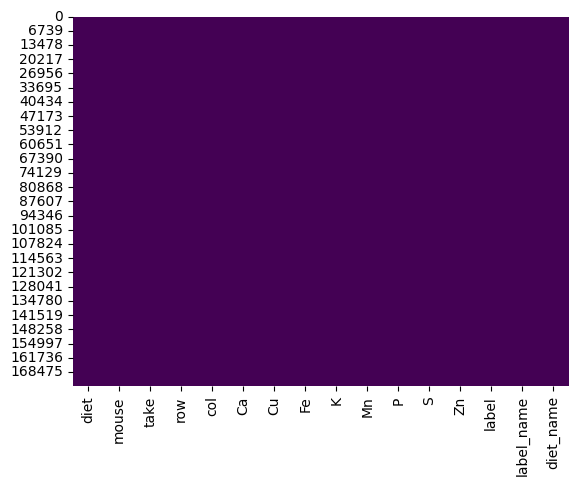

In [ ]:
sns.heatmap(df==None, cbar=False, cmap='viridis')

<Axes: >

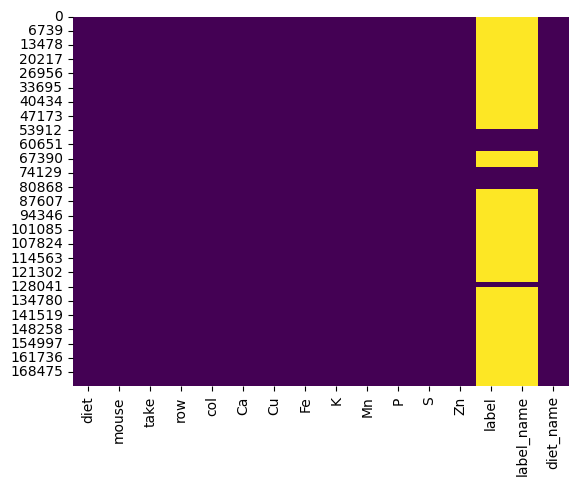

In [12]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

<Axes: >

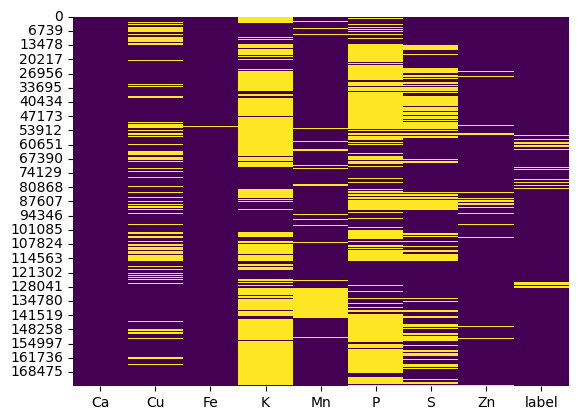

In [13]:
sns.heatmap(df_interesting==0, cbar=False, cmap='viridis')

Podemos observar que existen algunas estructuras de datos con valores 0 en el dataframe para las columnas de fluorecencia de elementos quimicos, y ademas observamos las filas estan con una clasificacion realizadas considerando la columna 'label'. 
Vamos a eliminar los ceros de cada una de las columnas de los elementos quimicos, ya que entendemos de los valores 0 en relacion a la fluorecencia de los elementos quimicos no nos aporta información relevante. 
Para realizar eso valor separar el dataframe original, en submuestras considerando los elementos quimicos de la fluorescencia.


**OPCIONAL**: Ademas vamos a analisar si es posible realizar otra limpieza, considerando las imagens de fluorecencia los elementos quimicos podemos observar que el 'mapcolor' el valor de baja fluorecencia no aporte datos relevantes y que ademas los datos ruidosos estan en el mismo range de intensidad por lo que decidimos filtrar tambien esos datos.

Podemos observar que no todos los datos tienen etiquetas associadas. Vamos a escoger las siguientes etiquetas para analizar porque creemos que está relacionada a posibles anomalias en el analisis histologicos. 
- 0: 'no-label' -- DESCARTADA
- 1: 'necrotic tissue' -- DESCARTADA PORQUE NO EXISTE ESA ETIQUETA
- 2: 'tumoral A'
- 3: 'tumoral B'
- 4: 'tumoral C'
- 5: 'artifacts'
- 6: 'blood'
- 7: 'loose connective tissue'
- 8: 'no sample' -- DESCARTADA
- 9: 'dense connective tissue'
- 10: 'paraffin' -- DESCARTADA


In [16]:
# Filtramos los datos para cada elemento químico y creamos un DataFrame con las columnas relevantes
df_label_Ca = df[df['Ca'] > 0][['diet_name','Ca','label_name','diet','label']]
df_label_Cu = df[df['Cu'] > 0][['diet_name','Cu','label_name','diet','label']]
df_label_Fe = df[df['Fe'] > 0][['diet_name','Fe','label_name','diet','label']]
df_label_K = df[df['K'] > 0][['diet_name','K','label_name','diet','label']]
df_label_Mn = df[df['Mn'] > 0][['diet_name','Mn','label_name','diet','label']]
df_label_P = df[df['P'] > 0][['diet_name','P','label_name','diet','label']]
df_label_S = df[df['S'] > 0][['diet_name','S','label_name','diet','label']]
df_label_Zn = df[df['Zn'] > 0][['diet_name','Zn','label_name','diet','label']]

In [57]:
# Visualización de la presencia de etiquetas
#fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(18, 12))
#sns.heatmap(df_label_Ca==0, cbar=False, cmap='viridis', ax=axs[0][0])
#sns.heatmap(df_label_Cu==0, cbar=False, cmap='viridis', ax=axs[0][1])
#sns.heatmap(df_label_Fe==0, cbar=False, cmap='viridis', ax=axs[0][2])
#sns.heatmap(df_label_K==0, cbar=False, cmap='viridis', ax=axs[0][3])
#sns.heatmap(df_label_Mn==0, cbar=False, cmap='viridis', ax=axs[1][0])
#sns.heatmap(df_label_P==0, cbar=False, cmap='viridis', ax=axs[1][1])
#sns.heatmap(df_label_S==0, cbar=False, cmap='viridis', ax=axs[1][2])
#sns.heatmap(df_label_Zn==0, cbar=False, cmap='viridis', ax=axs[1][3])

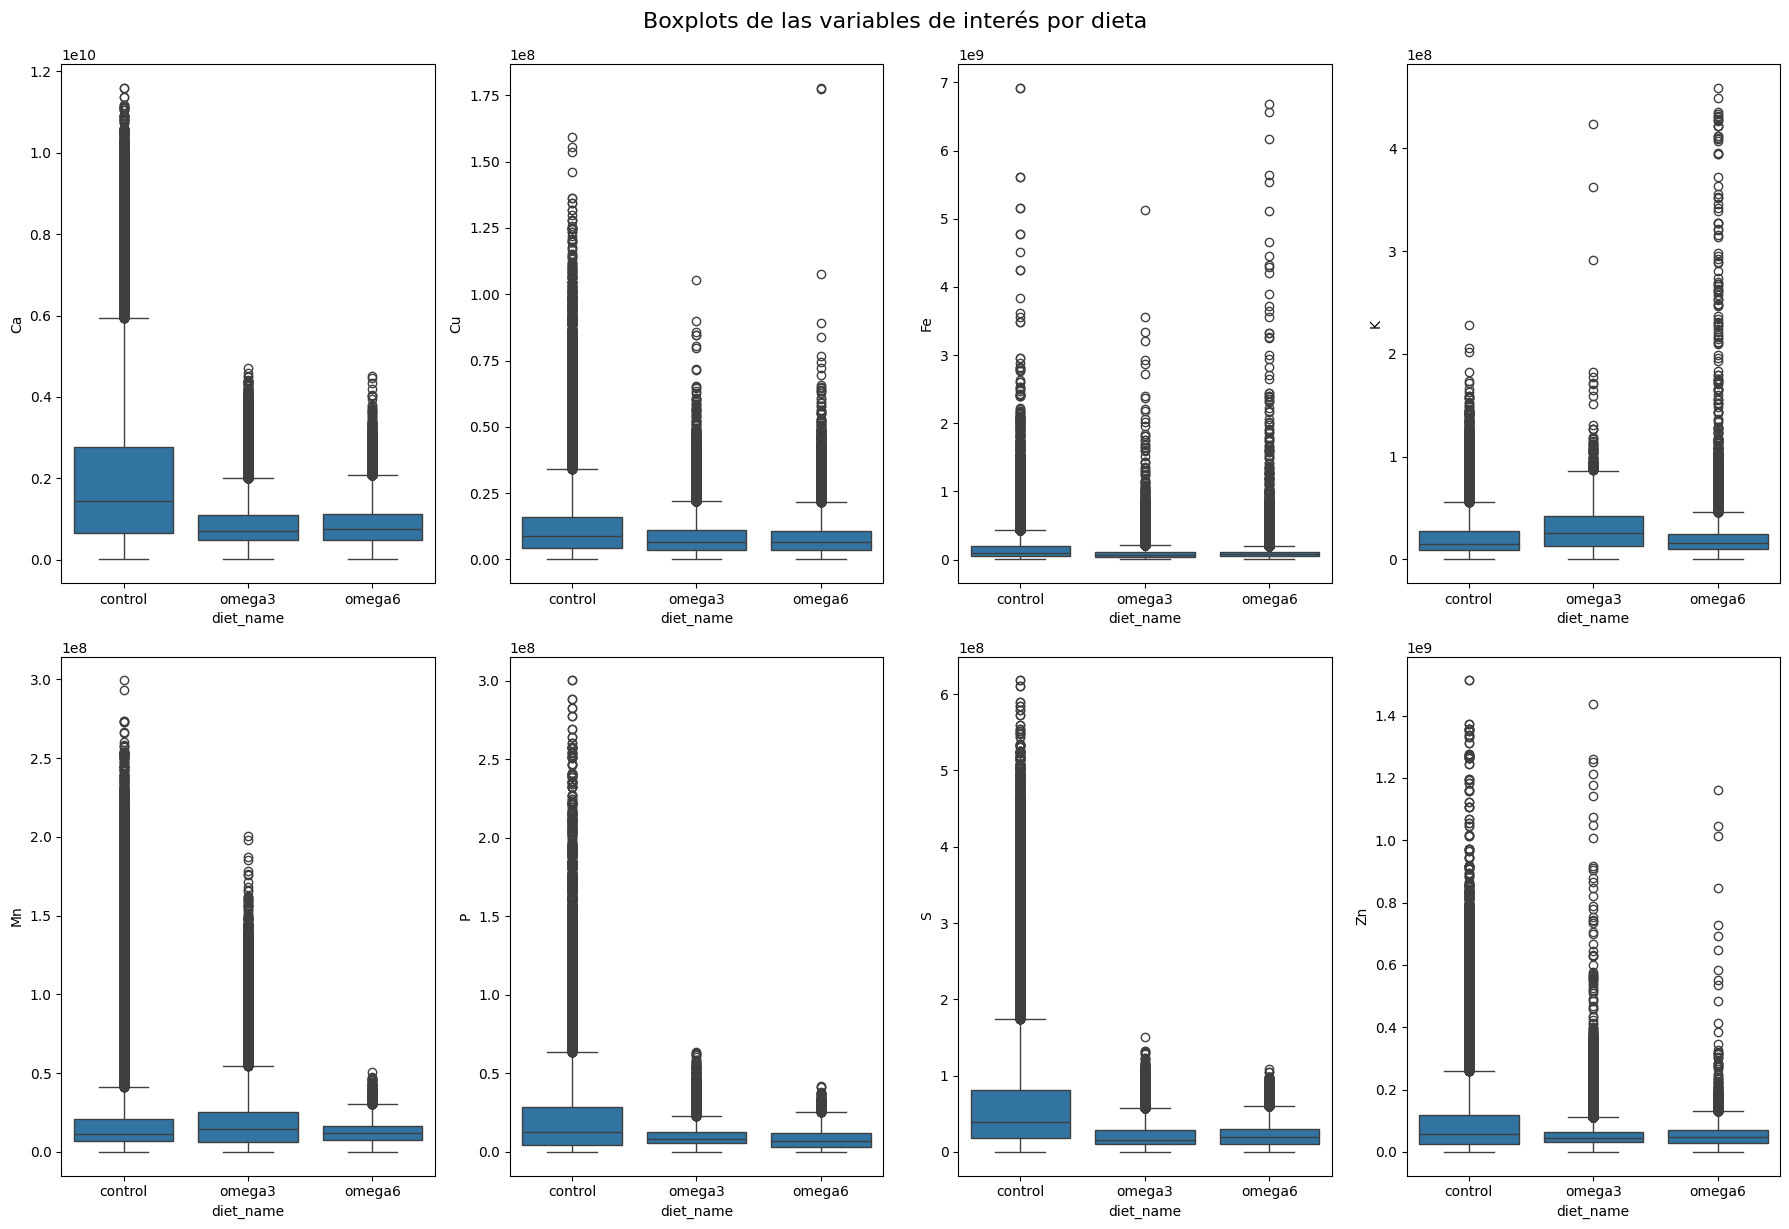

In [ ]:
# Boxplots para las variables de interés ['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn'] por dieta 

#fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(18, 12))
#sns.boxplot(data=df_label_Ca, x='diet_name', y='Ca', ax=axs[0][0])
#sns.boxplot(data=df_label_Cu, x='diet_name', y='Cu', ax=axs[0][1])
#sns.boxplot(data=df_label_Fe, x='diet_name', y='Fe', ax=axs[0][2])
#sns.boxplot(data=df_label_K, x='diet_name', y='K', ax=axs[0][3])
#sns.boxplot(data=df_label_Mn, x='diet_name', y='Mn', ax=axs[1][0])
#sns.boxplot(data=df_label_P, x='diet_name', y='P', ax=axs[1][1])
#sns.boxplot(data=df_label_S, x='diet_name', y='S', ax=axs[1][2])
#sns.boxplot(data=df_label_Zn, x='diet_name', y='Zn', ax=axs[1][3])
#plt.tight_layout()
#plt.suptitle('Boxplots de las variables de interés por dieta', fontsize=16, y=1.02)
#plt.show()

In [ ]:
from scipy import stats

# Lista de dataframes y variables correspondientes
dfs = [
    (df_label_Ca, 'Ca'),
    (df_label_Cu, 'Cu'),
    (df_label_Fe, 'Fe'),
    (df_label_K, 'K'),
    (df_label_Mn, 'Mn'),
    (df_label_P, 'P'),
    (df_label_S, 'S'),
    (df_label_Zn, 'Zn')
]

alpha = 0.05

for df_elem, var in dfs:
    print(f"\nResultados t-test para {var}:")
    # Obtener los grupos únicos de dieta
    grupos = [df_elem[df_elem['diet_name'] == d][var] for d in df_elem['diet_name'].unique()]
    dietas = df_elem['diet_name'].unique()
    # Comparar cada par de grupos
    for i in range(len(grupos)):
        for j in range(i+1, len(grupos)):
            stat, pval = stats.ttest_ind(grupos[i], grupos[j], equal_var=False)
            resultado = "Rechaza H0, las medias no son iguales" if pval < alpha else "No rechaza H0, las medias son iguales"
            print(f"Dieta {dietas[i]} vs Dieta {dietas[j]}: statistic={stat:.3f}, p-value={pval:.3e} -> {resultado}")


Resultados t-test para Ca:
Dieta omega6 vs Dieta control: statistic=-157.588, p-value=0.000e+00 -> Rechaza H0, las medias no son iguales
Dieta omega6 vs Dieta omega3: statistic=-17.303, p-value=5.699e-67 -> Rechaza H0, las medias no son iguales
Dieta control vs Dieta omega3: statistic=143.323, p-value=0.000e+00 -> Rechaza H0, las medias no son iguales

Resultados t-test para Cu:
Dieta omega6 vs Dieta control: statistic=-62.216, p-value=0.000e+00 -> Rechaza H0, las medias no son iguales
Dieta omega6 vs Dieta omega3: statistic=-5.374, p-value=7.730e-08 -> Rechaza H0, las medias no son iguales
Dieta control vs Dieta omega3: statistic=57.570, p-value=0.000e+00 -> Rechaza H0, las medias no son iguales

Resultados t-test para Fe:
Dieta omega6 vs Dieta control: statistic=-95.090, p-value=0.000e+00 -> Rechaza H0, las medias no son iguales
Dieta omega6 vs Dieta omega3: statistic=-4.726, p-value=2.297e-06 -> Rechaza H0, las medias no son iguales
Dieta control vs Dieta omega3: statistic=94.404, 

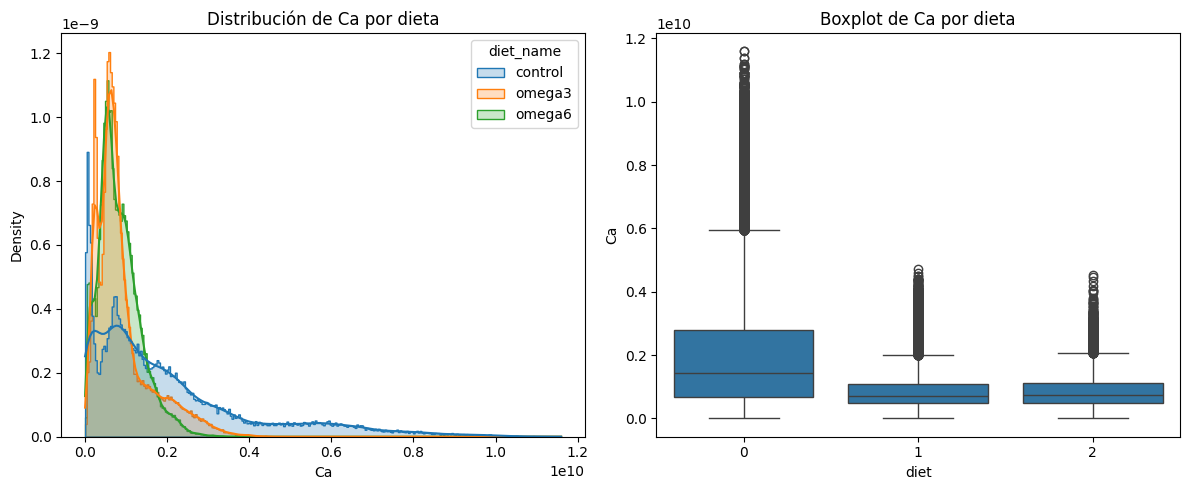

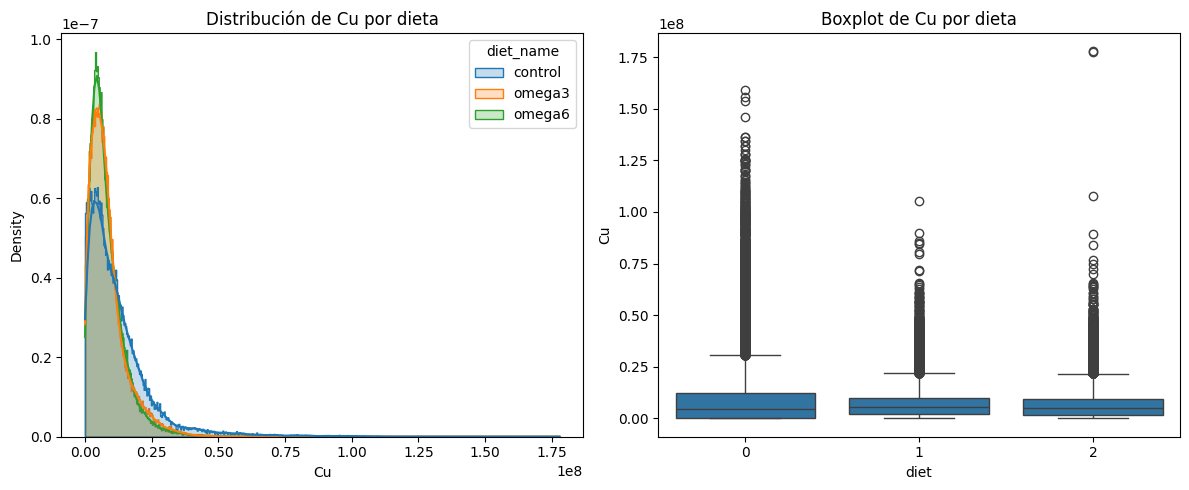

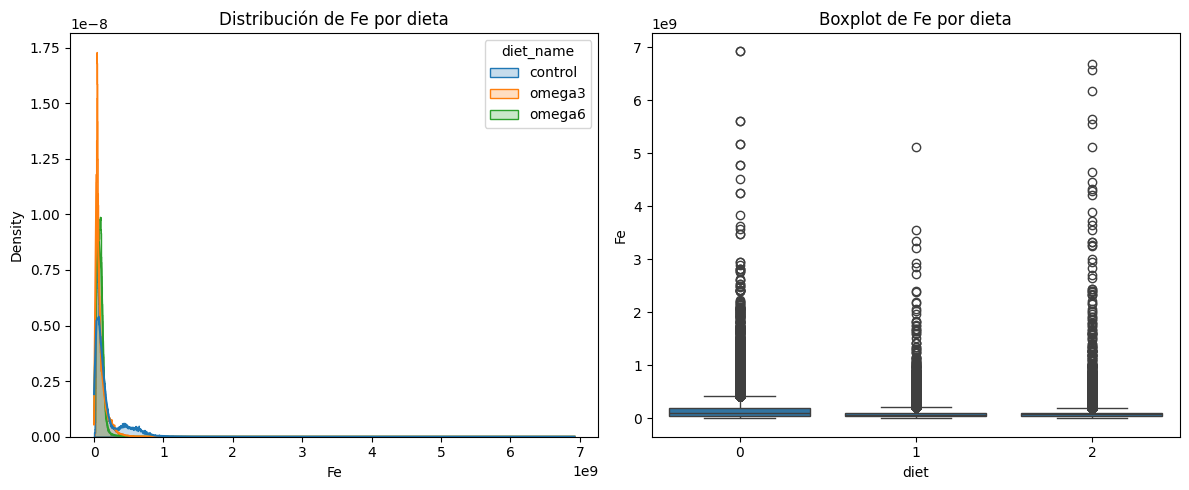

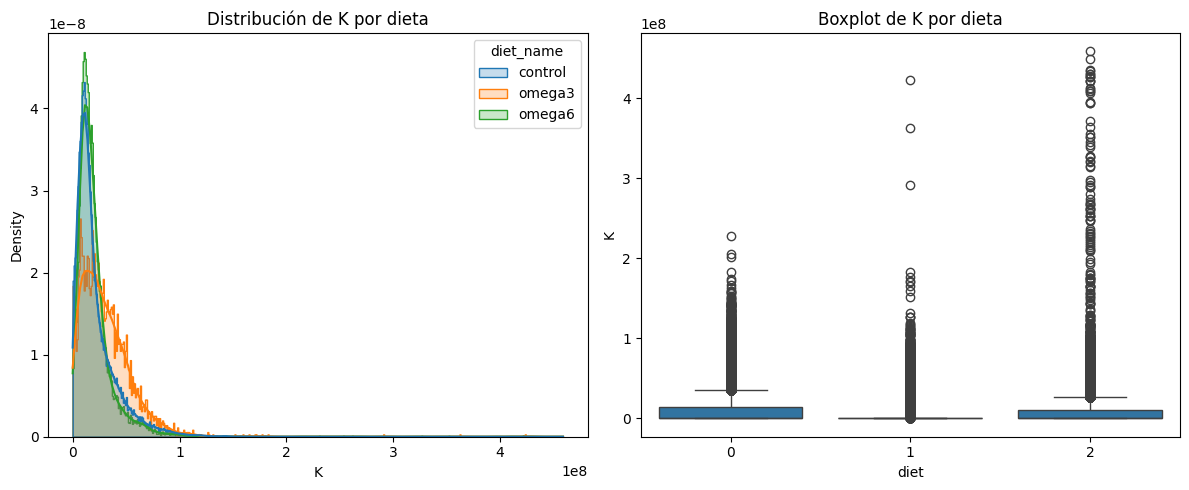

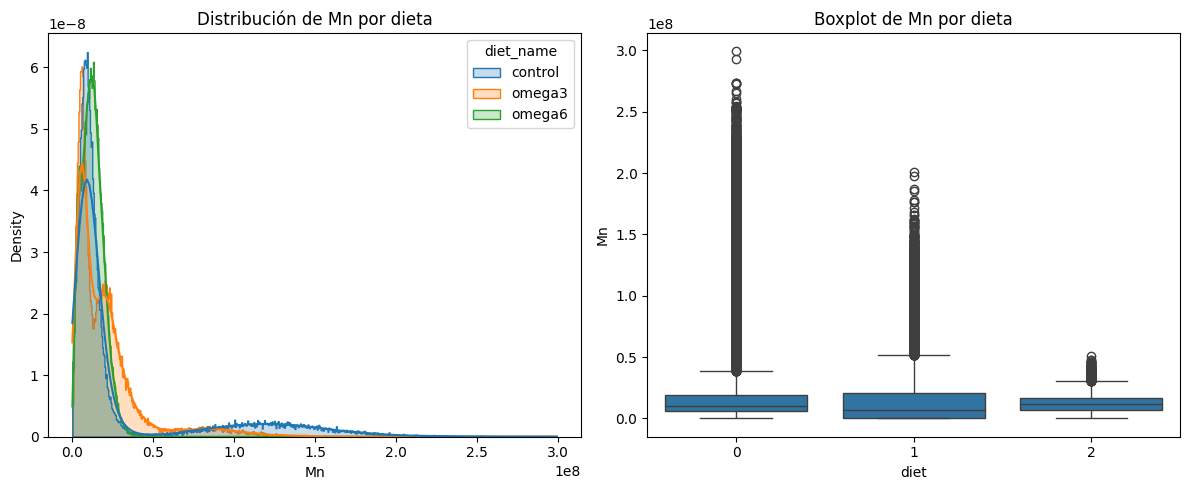

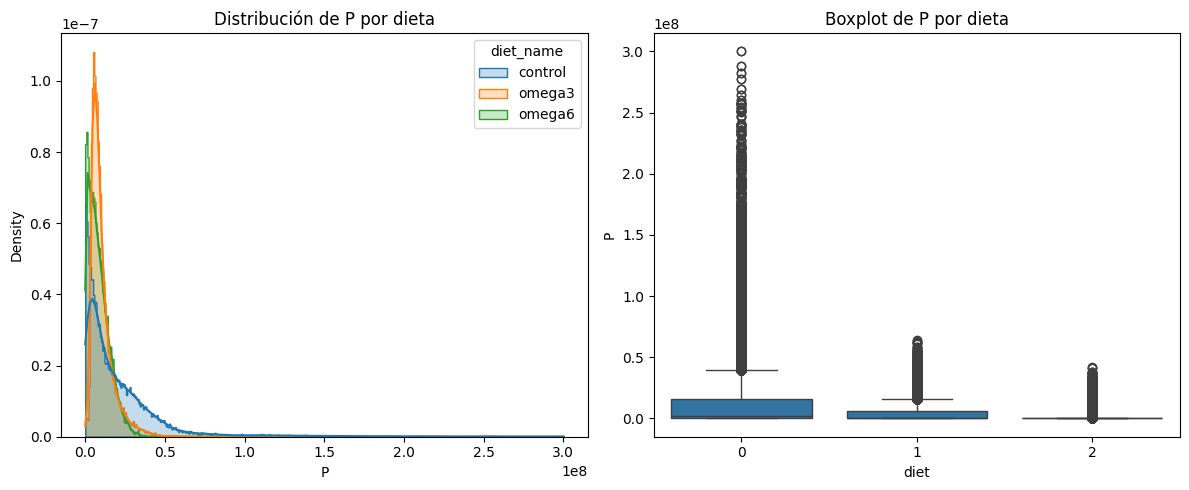

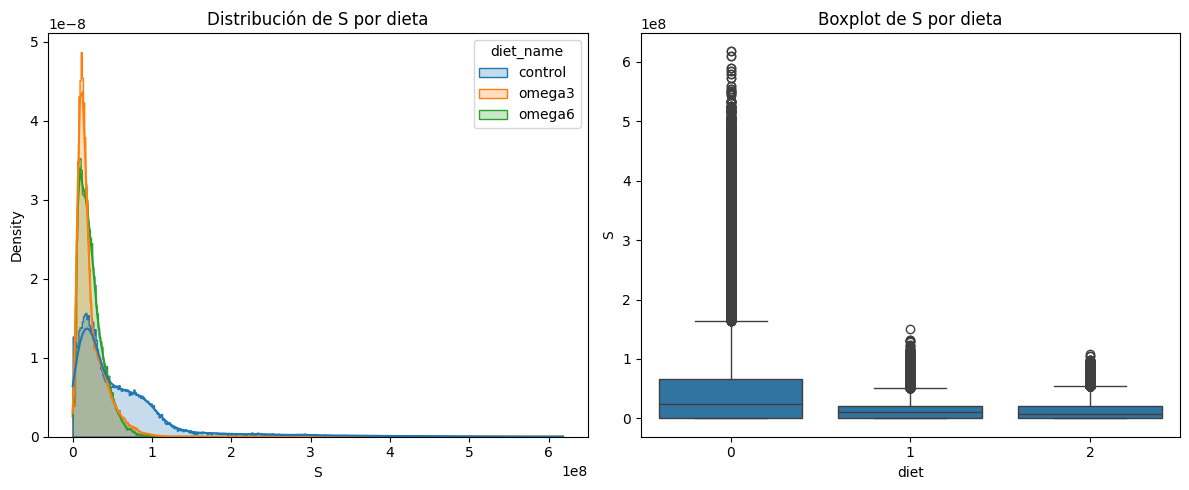

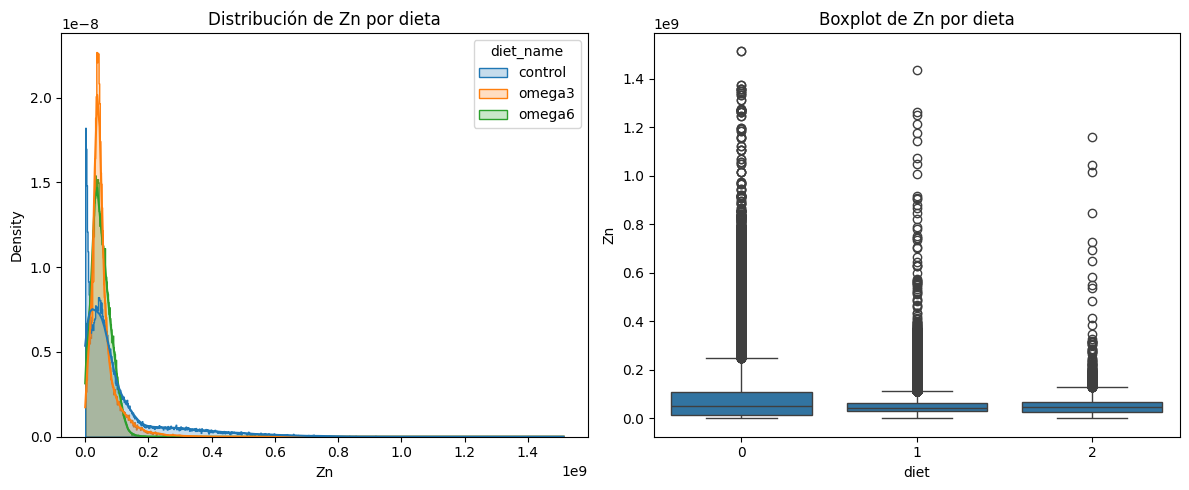

In [20]:
variables=['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P', 'S', 'Zn']
for var in variables:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    df1 = df[df[var]>0]
    sns.histplot(data=df1, x=var, hue='diet_name', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribución de {var} por dieta')
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='diet', y=var)
    plt.title(f'Boxplot de {var} por dieta')
    plt.tight_layout()
    plt.show()

<Figure size 1800x1800 with 0 Axes>

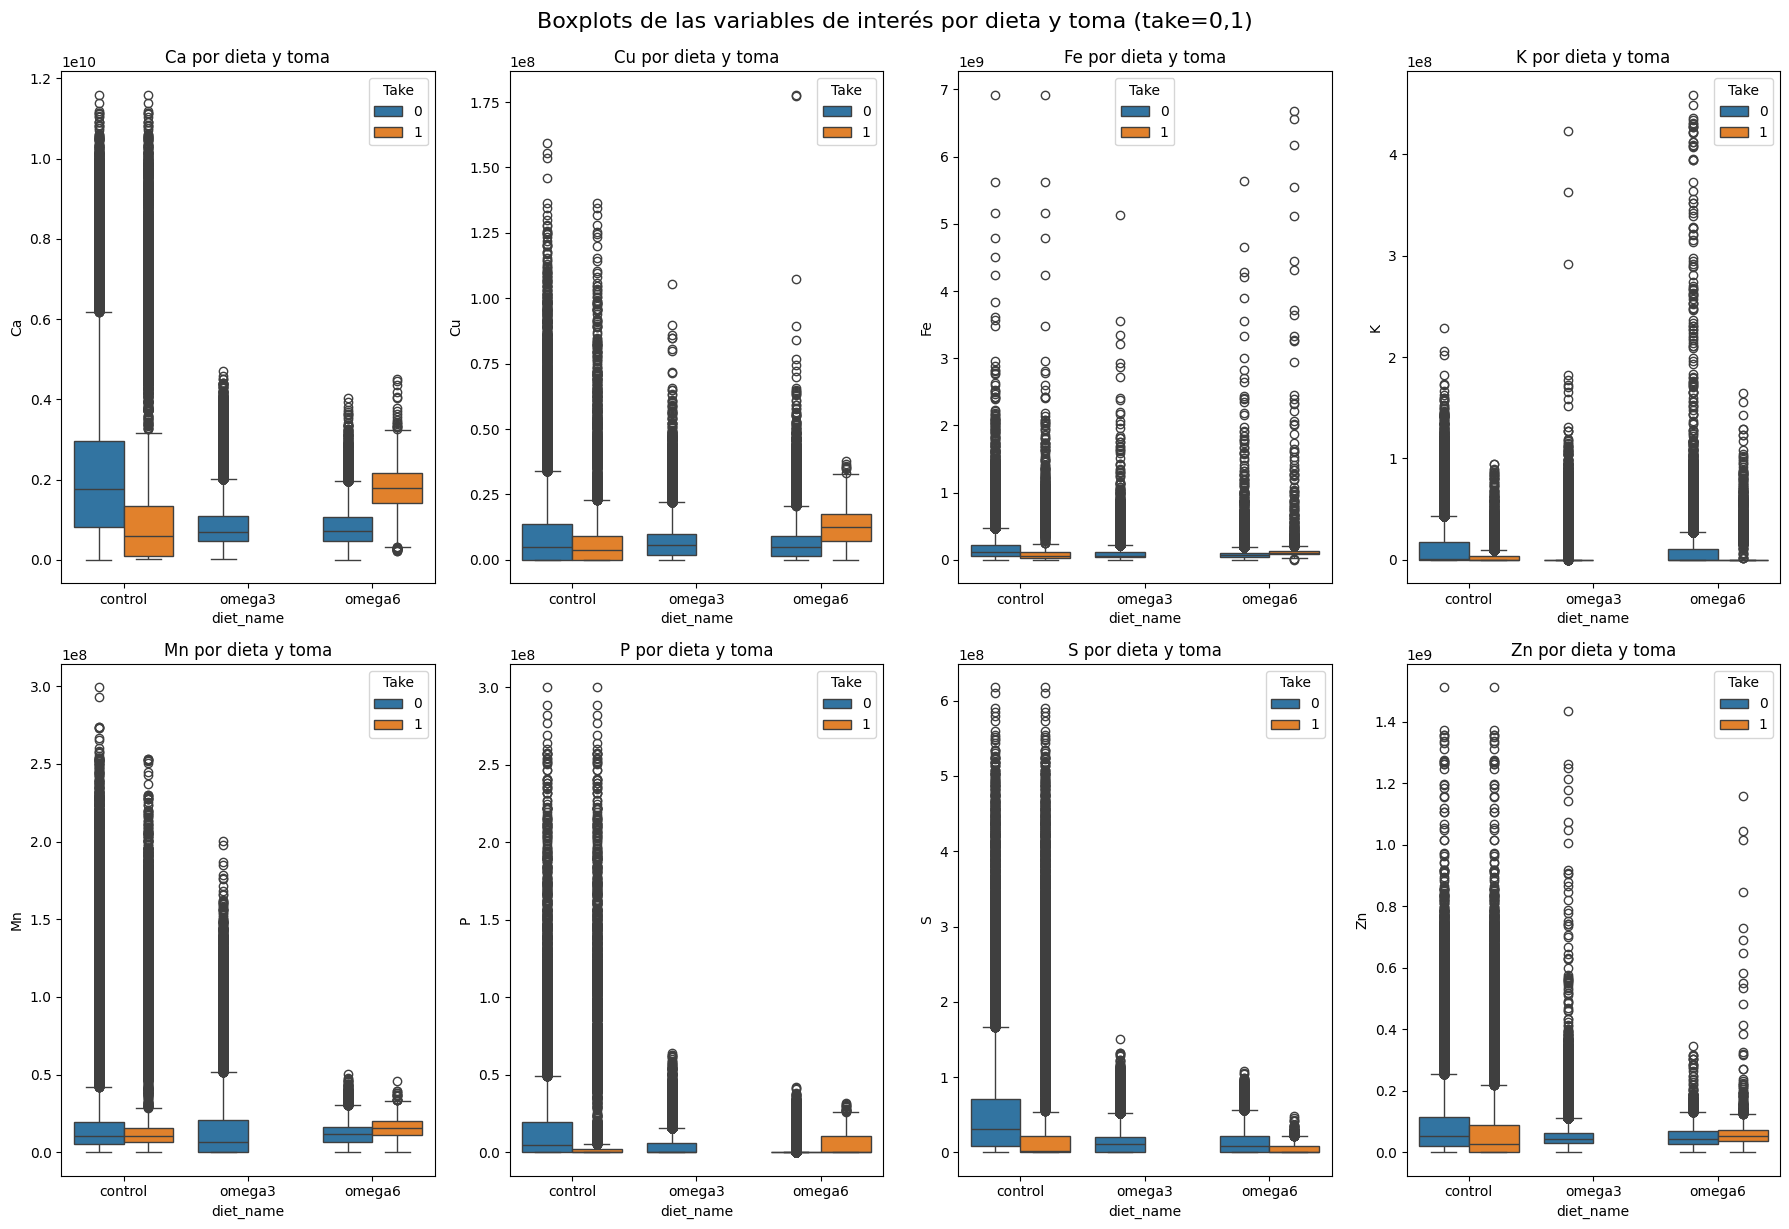

In [21]:
# Boxplots para las variables de interés ['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn'] por dieta y toma (take=0,1)
plt.figure(figsize=(18, 18))
fig2, axs2 = plt.subplots(ncols=4, nrows=2, figsize=(18, 12))
variables = ['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P', 'S', 'Zn']

for i, var in enumerate(variables):
    row, col = divmod(i, 4)
    sns.boxplot(data=df[df['take'].isin([0, 1])], x='diet_name', y=var, hue='take', ax=axs2[row][col])
    axs2[row][col].set_title(f'{var} por dieta y toma')
    axs2[row][col].legend(title='Take', loc='best')

plt.tight_layout()
plt.suptitle('Boxplots de las variables de interés por dieta y toma (take=0,1)', fontsize=16, y=1.02)
plt.show()

In [22]:
labels_interesting=['tumoral A','tumoral B','tumoral C','artifacts','blood','loose connective tissue','dense connective tissue']

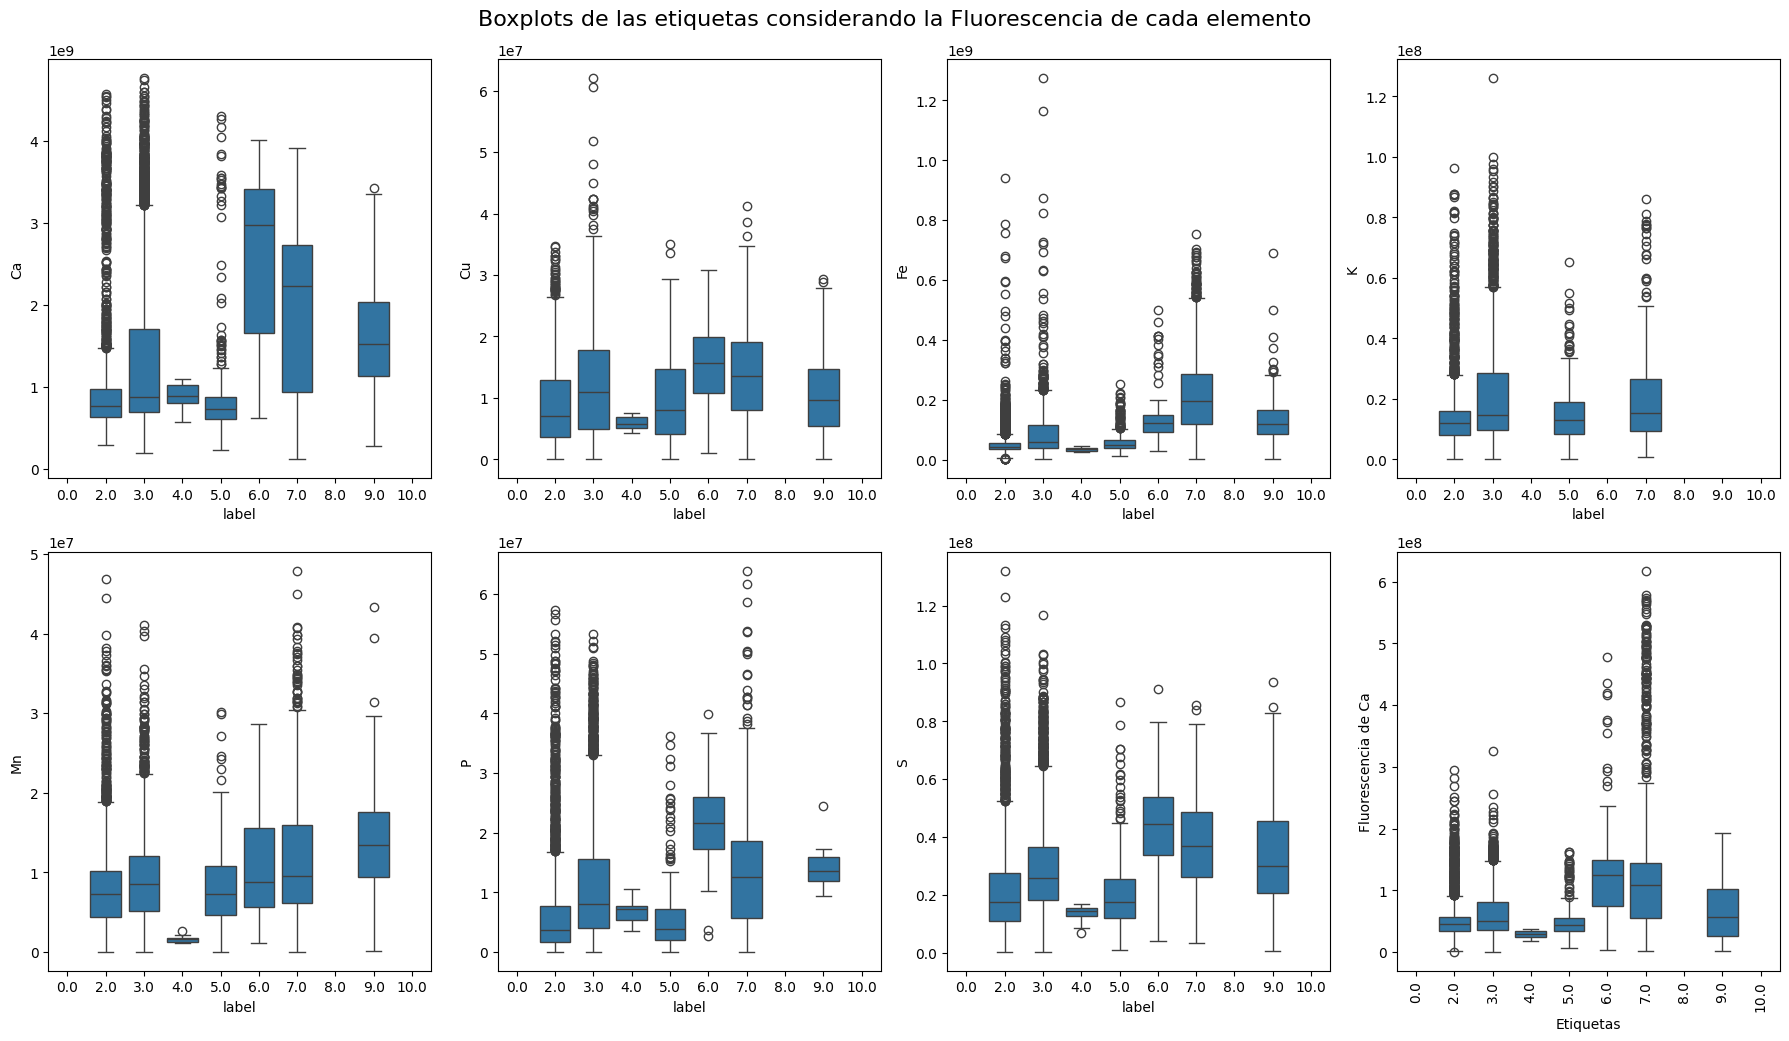

In [23]:
# Boxplots para las etiquetas considerando la Flourescencia de cada elemento
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(18, 10))
sns.boxplot(data=df_label_Ca[df_label_Ca['label_name'].isin(labels_interesting)], x='label', y='Ca', ax=axs[0][0])
sns.boxplot(data=df_label_Cu[df_label_Cu['label_name'].isin(labels_interesting)], x='label', y='Cu', ax=axs[0][1])
sns.boxplot(data=df_label_Fe[df_label_Fe['label_name'].isin(labels_interesting)], x='label', y='Fe', ax=axs[0][2])
sns.boxplot(data=df_label_K[df_label_K['label_name'].isin(labels_interesting)], x='label', y='K', ax=axs[0][3])
sns.boxplot(data=df_label_Mn[df_label_Mn['label_name'].isin(labels_interesting)], x='label', y='Mn', ax=axs[1][0])
sns.boxplot(data=df_label_P[df_label_P['label_name'].isin(labels_interesting)], x='label', y='P', ax=axs[1][1])
sns.boxplot(data=df_label_S[df_label_S['label_name'].isin(labels_interesting)], x='label', y='S', ax=axs[1][2])
sns.boxplot(data=df_label_Zn[df_label_Zn['label_name'].isin(labels_interesting)], x='label', y='Zn', ax=axs[1][3])
plt.tight_layout()
plt.suptitle('Boxplots de las etiquetas considerando la Fluorescencia de cada elemento', fontsize=16, y=1.02)
plt.xticks(rotation=90)
plt.xlabel('Etiquetas')
plt.ylabel('Fluorescencia de Ca')
plt.show()

# Boxplots para las etiquetas considerando la Flourescencia de Ca
## Se filtran las etiquetas de interés y se crea un boxplot para la variable 'Ca'

/var/folders/9x/sk5wzh9n465bsgp0vntddj3w0000gn/T/ipykernel_20501/34758617.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_Ca_by_label = df_label_Ca[df_label_Ca['label_name'].isin(labels_interesting)].groupby('label_name')['Ca'].mean().sort_values()
/var/folders/9x/sk5wzh9n465bsgp0vntddj3w0000gn/T/ipykernel_20501/34758617.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_Ca_by_label.index, y=mean_Ca_by_label.values, palette='viridis', ax=axs[1])
/var/folders/9x/sk5wzh9n465bsgp0vntddj3w0000gn/T/ipykernel_20501/34758617.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or usi

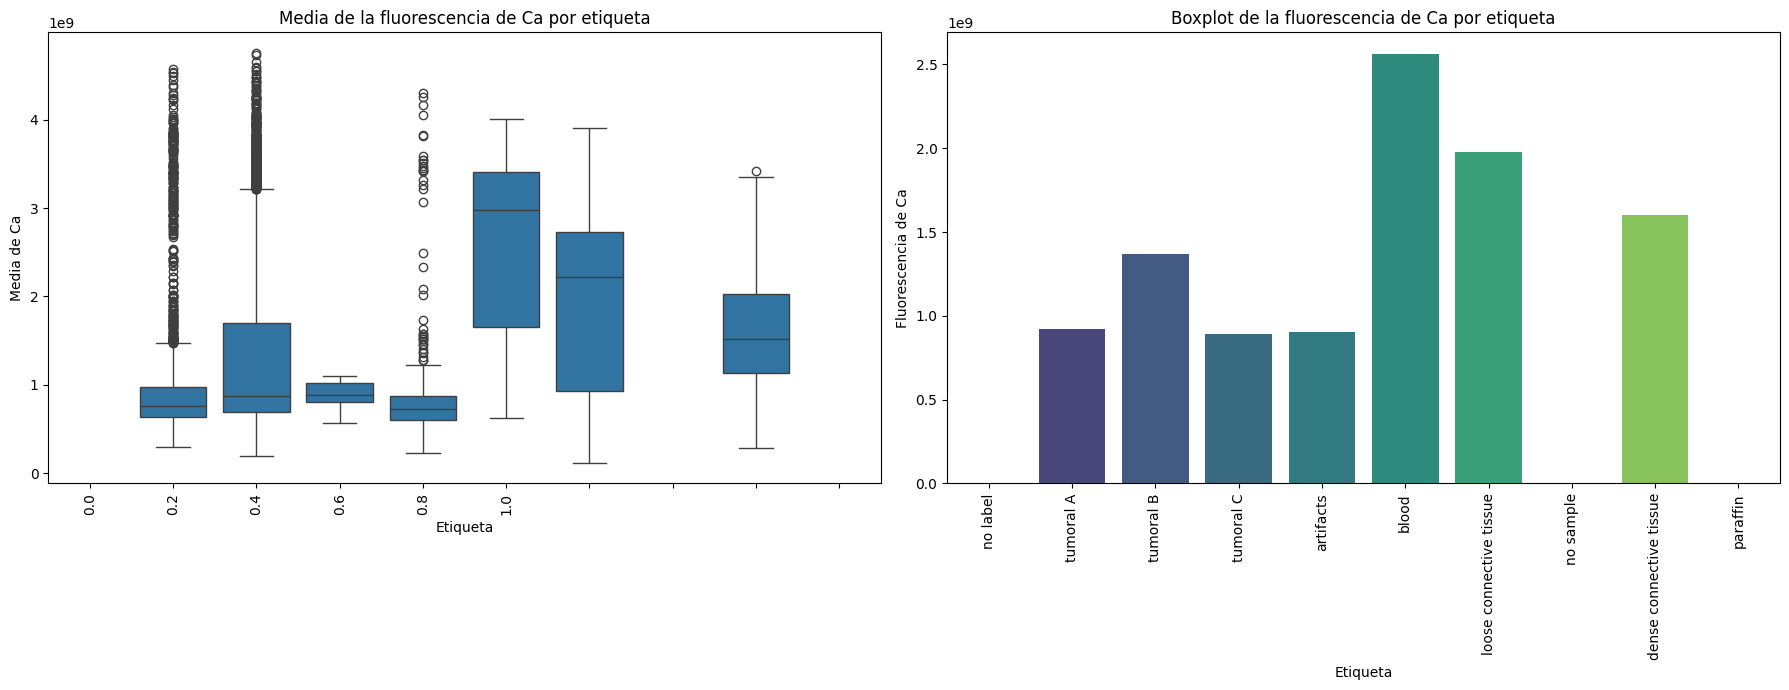

In [33]:
# Gráficos de la media y boxplot de la fluorescencia de Ca para cada label de interés, uno al lado del otro
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18, 7))

# Gráfico de barras de la media de Ca por etiqueta
mean_Ca_by_label = df_label_Ca[df_label_Ca['label_name'].isin(labels_interesting)].groupby('label_name')['Ca'].mean().sort_values()
sns.barplot(x=mean_Ca_by_label.index, y=mean_Ca_by_label.values, palette='viridis', ax=axs[1])
axs[0].set_title('Media de la fluorescencia de Ca por etiqueta')
axs[0].set_xlabel('Etiqueta')
axs[0].set_ylabel('Media de Ca')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)

# Boxplot de Ca por etiqueta
sns.boxplot(data=df_label_Ca[df_label_Ca['label_name'].isin(labels_interesting)], x='label_name', y='Ca', ax=axs[0])
axs[1].set_title('Boxplot de la fluorescencia de Ca por etiqueta')
axs[1].set_xlabel('Etiqueta')
axs[1].set_ylabel('Fluorescencia de Ca')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

# Perfil de distribucion de Fluorescencia del Ca para cada etiqueta seleccionada


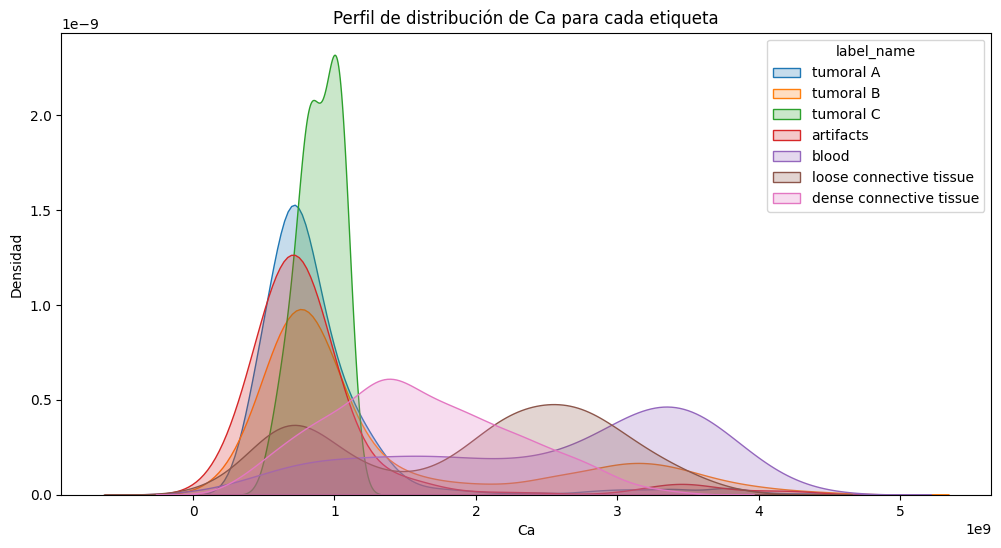

In [25]:
plt.figure(figsize=(12, 6))
for label in labels_interesting:
    sns.kdeplot(
        data=df_label_Ca[df_label_Ca['label_name'] == label],
        x='Ca',
        label=label,
        fill=True
    )
plt.title('Perfil de distribución de Ca para cada etiqueta')
plt.xlabel('Ca')
plt.ylabel('Densidad')
plt.legend(title='label_name')
plt.show()

# Prueba de Hipotesis de T-Student para la Flourescencia del CA

In [48]:
alpha = 0.05
grupos = [df_label_Ca[df_label_Ca['label_name'] == d]['Ca'] for d in labels_interesting]
# Comparar cada par de grupos
for i in range(len(grupos)):
    for j in range(i+1, len(grupos)):
        stat, pval = stats.ttest_ind(grupos[i], grupos[j], equal_var=False)
        resultado = "Rechaza H0, las medias no son iguales" if pval < alpha else "No rechaza H0, las medias son iguales"
        if resultado == "Rechaza H0, las medias no son iguales":
            print(f"{labels_interesting[i]} vs. {labels_interesting[j]}: statistic={stat:.3f}, p-value={pval:.3e} -> {resultado}")
        else:
            pass

tumoral A vs. tumoral B: statistic=-23.572, p-value=5.024e-118 -> Rechaza H0, las medias no son iguales
tumoral A vs. blood: statistic=-16.138, p-value=1.055e-29 -> Rechaza H0, las medias no son iguales
tumoral A vs. loose connective tissue: statistic=-30.218, p-value=7.216e-141 -> Rechaza H0, las medias no son iguales
tumoral A vs. dense connective tissue: statistic=-23.581, p-value=1.677e-91 -> Rechaza H0, las medias no son iguales
tumoral B vs. tumoral C: statistic=14.587, p-value=1.710e-18 -> Rechaza H0, las medias no son iguales
tumoral B vs. artifacts: statistic=11.541, p-value=1.314e-27 -> Rechaza H0, las medias no son iguales
tumoral B vs. blood: statistic=-11.654, p-value=1.367e-20 -> Rechaza H0, las medias no son iguales
tumoral B vs. loose connective tissue: statistic=-16.334, p-value=2.361e-54 -> Rechaza H0, las medias no son iguales
tumoral B vs. dense connective tissue: statistic=-7.421, p-value=2.443e-13 -> Rechaza H0, las medias no son iguales
tumoral C vs. blood: stati

# Prueba de Hipotesis de T-Student para la Flourescencia del S

In [55]:
alpha = 0.05
grupos = [df_label_Mn[df_label_Mn['label_name'] == d]['Mn'] for d in labels_interesting]
# Comparar cada par de grupos
for i in range(len(grupos)):
    for j in range(i+1, len(grupos)):
        stat, pval = stats.ttest_ind(grupos[i], grupos[j], equal_var=False)
        resultado = "Rechaza H0, las medias no son iguales" if pval < alpha else "No rechaza H0, las medias son iguales"
        if resultado == "Rechaza H0, las medias no son iguales":
            print(f"{labels_interesting[i]} vs. {labels_interesting[j]}: statistic={stat:.3f}, p-value={pval:.3e} -> {resultado}")
        else:
            pass

tumoral A vs. tumoral B: statistic=-8.244, p-value=1.991e-16 -> Rechaza H0, las medias no son iguales
tumoral A vs. tumoral C: statistic=37.407, p-value=1.328e-20 -> Rechaza H0, las medias no son iguales
tumoral A vs. blood: statistic=-3.264, p-value=1.693e-03 -> Rechaza H0, las medias no son iguales
tumoral A vs. loose connective tissue: statistic=-12.122, p-value=2.857e-31 -> Rechaza H0, las medias no son iguales
tumoral A vs. dense connective tissue: statistic=-20.378, p-value=7.581e-73 -> Rechaza H0, las medias no son iguales
tumoral B vs. tumoral C: statistic=43.737, p-value=2.836e-22 -> Rechaza H0, las medias no son iguales
tumoral B vs. artifacts: statistic=3.392, p-value=7.674e-04 -> Rechaza H0, las medias no son iguales
tumoral B vs. loose connective tissue: statistic=-8.875, p-value=4.160e-18 -> Rechaza H0, las medias no son iguales
tumoral B vs. dense connective tissue: statistic=-16.308, p-value=5.656e-51 -> Rechaza H0, las medias no son iguales
tumoral C vs. artifacts: sta

# Prueba de Hipotesis de T-Student para la Flourescencia del K

In [50]:
alpha = 0.05
grupos = [df_label_K[df_label_K['label_name'] == d]['K'] for d in labels_interesting]
# Comparar cada par de grupos
for i in range(len(grupos)):
    for j in range(i+1, len(grupos)):
        stat, pval = stats.ttest_ind(grupos[i], grupos[j], equal_var=False)
        resultado = "Rechaza H0, las medias no son iguales" if pval < alpha else "No rechaza H0, las medias son iguales"
        if resultado == "Rechaza H0, las medias no son iguales":
            print(f"{labels_interesting[i]} vs. {labels_interesting[j]}: statistic={stat:.3f}, p-value={pval:.3e} -> {resultado}")
        else:
            pass

tumoral A vs. tumoral B: statistic=-20.899, p-value=4.541e-92 -> Rechaza H0, las medias no son iguales
tumoral A vs. artifacts: statistic=-2.508, p-value=1.258e-02 -> Rechaza H0, las medias no son iguales
tumoral A vs. loose connective tissue: statistic=-5.830, p-value=2.940e-08 -> Rechaza H0, las medias no son iguales
tumoral B vs. artifacts: statistic=9.746, p-value=7.955e-21 -> Rechaza H0, las medias no son iguales
artifacts vs. loose connective tissue: statistic=-4.700, p-value=4.897e-06 -> Rechaza H0, las medias no son iguales


/Users/peluso/WorkSpace/Diplomatura_Ciencia_de_Dados/Mentoria_10/env_ment10/lib/python3.10/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


# Prueba de Hipotesis de T-Student para la Flourescencia del Zn

In [51]:
alpha = 0.05
grupos = [df_label_Zn[df_label_Zn['label_name'] == d]['Zn'] for d in labels_interesting]
# Comparar cada par de grupos
for i in range(len(grupos)):
    for j in range(i+1, len(grupos)):
        stat, pval = stats.ttest_ind(grupos[i], grupos[j], equal_var=False)
        resultado = "Rechaza H0, las medias no son iguales" if pval < alpha else "No rechaza H0, las medias son iguales"
        if resultado == "Rechaza H0, las medias no son iguales":
            print(f"{labels_interesting[i]} vs. {labels_interesting[j]}: statistic={stat:.3f}, p-value={pval:.3e} -> {resultado}")
        else:
            pass

tumoral A vs. tumoral B: statistic=-15.938, p-value=2.854e-56 -> Rechaza H0, las medias no son iguales
tumoral A vs. tumoral C: statistic=17.175, p-value=3.384e-18 -> Rechaza H0, las medias no son iguales
tumoral A vs. blood: statistic=-8.133, p-value=1.214e-12 -> Rechaza H0, las medias no son iguales
tumoral A vs. loose connective tissue: statistic=-19.562, p-value=4.351e-70 -> Rechaza H0, las medias no son iguales
tumoral A vs. dense connective tissue: statistic=-8.157, p-value=1.848e-15 -> Rechaza H0, las medias no son iguales
tumoral B vs. tumoral C: statistic=25.656, p-value=3.699e-26 -> Rechaza H0, las medias no son iguales
tumoral B vs. artifacts: statistic=8.190, p-value=2.229e-15 -> Rechaza H0, las medias no son iguales
tumoral B vs. blood: statistic=-6.884, p-value=5.234e-10 -> Rechaza H0, las medias no son iguales
tumoral B vs. loose connective tissue: statistic=-16.945, p-value=1.919e-55 -> Rechaza H0, las medias no son iguales
tumoral B vs. dense connective tissue: statist

# Prueba de Hipotesis de T-Student para la Flourescencia del Fe

In [52]:
alpha = 0.05
grupos = [df_label_Fe[df_label_Fe['label_name'] == d]['Fe'] for d in labels_interesting]
# Comparar cada par de grupos
for i in range(len(grupos)):
    for j in range(i+1, len(grupos)):
        stat, pval = stats.ttest_ind(grupos[i], grupos[j], equal_var=False)
        resultado = "Rechaza H0, las medias no son iguales" if pval < alpha else "No rechaza H0, las medias son iguales"
        if resultado == "Rechaza H0, las medias no son iguales":
            print(f"{labels_interesting[i]} vs. {labels_interesting[j]}: statistic={stat:.3f}, p-value={pval:.3e} -> {resultado}")
        else:
            pass

tumoral A vs. tumoral B: statistic=-22.281, p-value=2.121e-106 -> Rechaza H0, las medias no son iguales
tumoral A vs. tumoral C: statistic=14.303, p-value=5.067e-19 -> Rechaza H0, las medias no son iguales
tumoral A vs. artifacts: statistic=-3.345, p-value=8.878e-04 -> Rechaza H0, las medias no son iguales
tumoral A vs. blood: statistic=-9.642, p-value=5.903e-16 -> Rechaza H0, las medias no son iguales
tumoral A vs. loose connective tissue: statistic=-31.451, p-value=8.450e-144 -> Rechaza H0, las medias no son iguales
tumoral A vs. dense connective tissue: statistic=-26.600, p-value=2.147e-106 -> Rechaza H0, las medias no son iguales
tumoral B vs. tumoral C: statistic=30.738, p-value=7.264e-46 -> Rechaza H0, las medias no son iguales
tumoral B vs. artifacts: statistic=9.752, p-value=5.812e-21 -> Rechaza H0, las medias no son iguales
tumoral B vs. blood: statistic=-6.560, p-value=2.294e-09 -> Rechaza H0, las medias no son iguales
tumoral B vs. loose connective tissue: statistic=-25.717,

# Prueba de Hipotesis de T-Student para la Flourescencia del S

In [53]:
alpha = 0.05
grupos = [df_label_S[df_label_S['label_name'] == d]['S'] for d in labels_interesting]
# Comparar cada par de grupos
for i in range(len(grupos)):
    for j in range(i+1, len(grupos)):
        stat, pval = stats.ttest_ind(grupos[i], grupos[j], equal_var=False)
        resultado = "Rechaza H0, las medias no son iguales" if pval < alpha else "No rechaza H0, las medias son iguales"
        if resultado == "Rechaza H0, las medias no son iguales":
            print(f"{labels_interesting[i]} vs. {labels_interesting[j]}: statistic={stat:.3f}, p-value={pval:.3e} -> {resultado}")
        else:
            pass

tumoral A vs. tumoral B: statistic=-22.046, p-value=1.481e-104 -> Rechaza H0, las medias no son iguales
tumoral A vs. tumoral C: statistic=13.661, p-value=1.588e-16 -> Rechaza H0, las medias no son iguales
tumoral A vs. blood: statistic=-11.204, p-value=1.729e-18 -> Rechaza H0, las medias no son iguales
tumoral A vs. loose connective tissue: statistic=-25.606, p-value=1.604e-111 -> Rechaza H0, las medias no son iguales
tumoral A vs. dense connective tissue: statistic=-13.106, p-value=1.287e-33 -> Rechaza H0, las medias no son iguales
tumoral B vs. tumoral C: statistic=27.784, p-value=3.500e-28 -> Rechaza H0, las medias no son iguales
tumoral B vs. artifacts: statistic=13.089, p-value=9.850e-34 -> Rechaza H0, las medias no son iguales
tumoral B vs. blood: statistic=-6.991, p-value=5.462e-10 -> Rechaza H0, las medias no son iguales
tumoral B vs. loose connective tissue: statistic=-12.628, p-value=4.375e-34 -> Rechaza H0, las medias no son iguales
tumoral B vs. dense connective tissue: st

# Prueba de Hipotesis de T-Student para la Flourescencia del Cu

In [54]:
alpha = 0.05
grupos = [df_label_Cu[df_label_Cu['label_name'] == d]['Cu'] for d in labels_interesting]
# Comparar cada par de grupos
for i in range(len(grupos)):
    for j in range(i+1, len(grupos)):
        stat, pval = stats.ttest_ind(grupos[i], grupos[j], equal_var=False)
        resultado = "Rechaza H0, las medias no son iguales" if pval < alpha else "No rechaza H0, las medias son iguales"
        if resultado == "Rechaza H0, las medias no son iguales":
            print(f"{labels_interesting[i]} vs. {labels_interesting[j]}: statistic={stat:.3f}, p-value={pval:.3e} -> {resultado}")
        else:
            pass

tumoral A vs. tumoral B: statistic=-17.037, p-value=1.367e-63 -> Rechaza H0, las medias no son iguales
tumoral A vs. tumoral C: statistic=11.979, p-value=1.864e-15 -> Rechaza H0, las medias no son iguales
tumoral A vs. artifacts: statistic=-2.327, p-value=2.060e-02 -> Rechaza H0, las medias no son iguales
tumoral A vs. blood: statistic=-9.168, p-value=9.627e-15 -> Rechaza H0, las medias no son iguales
tumoral A vs. loose connective tissue: statistic=-16.484, p-value=3.973e-54 -> Rechaza H0, las medias no son iguales
tumoral A vs. dense connective tissue: statistic=-5.314, p-value=1.489e-07 -> Rechaza H0, las medias no son iguales
tumoral B vs. tumoral C: statistic=23.936, p-value=4.905e-31 -> Rechaza H0, las medias no son iguales
tumoral B vs. artifacts: statistic=4.939, p-value=1.211e-06 -> Rechaza H0, las medias no son iguales
tumoral B vs. blood: statistic=-4.581, p-value=1.361e-05 -> Rechaza H0, las medias no son iguales
tumoral B vs. loose connective tissue: statistic=-5.693, p-va

# Prueba de Hipotesis de T-Student para la Flourescencia del P

In [56]:
alpha = 0.05
grupos = [df_label_P[df_label_P['label_name'] == d]['P'] for d in labels_interesting]
# Comparar cada par de grupos
for i in range(len(grupos)):
    for j in range(i+1, len(grupos)):
        stat, pval = stats.ttest_ind(grupos[i], grupos[j], equal_var=False)
        resultado = "Rechaza H0, las medias no son iguales" if pval < alpha else "No rechaza H0, las medias son iguales"
        if resultado == "Rechaza H0, las medias no son iguales":
            print(f"{labels_interesting[i]} vs. {labels_interesting[j]}: statistic={stat:.3f}, p-value={pval:.3e} -> {resultado}")
        else:
            pass

tumoral A vs. tumoral B: statistic=-22.398, p-value=3.309e-107 -> Rechaza H0, las medias no son iguales
tumoral A vs. artifacts: statistic=2.377, p-value=1.787e-02 -> Rechaza H0, las medias no son iguales
tumoral A vs. blood: statistic=-16.233, p-value=9.964e-25 -> Rechaza H0, las medias no son iguales
tumoral A vs. loose connective tissue: statistic=-12.363, p-value=1.159e-29 -> Rechaza H0, las medias no son iguales
tumoral A vs. dense connective tissue: statistic=-5.457, p-value=5.647e-04 -> Rechaza H0, las medias no son iguales
tumoral B vs. tumoral C: statistic=12.959, p-value=5.391e-16 -> Rechaza H0, las medias no son iguales
tumoral B vs. artifacts: statistic=15.698, p-value=2.539e-45 -> Rechaza H0, las medias no son iguales
tumoral B vs. blood: statistic=-10.918, p-value=1.543e-16 -> Rechaza H0, las medias no son iguales
tumoral B vs. loose connective tissue: statistic=-4.551, p-value=7.163e-06 -> Rechaza H0, las medias no son iguales
tumoral C vs. artifacts: statistic=2.299, p-

# Podemos observar que usando un test de hipotesis de t-student para las diferentes submuestras, que no existen evidencias significativas para fluorescencia Ca entre las diferentes etiquetas seleccionadas.

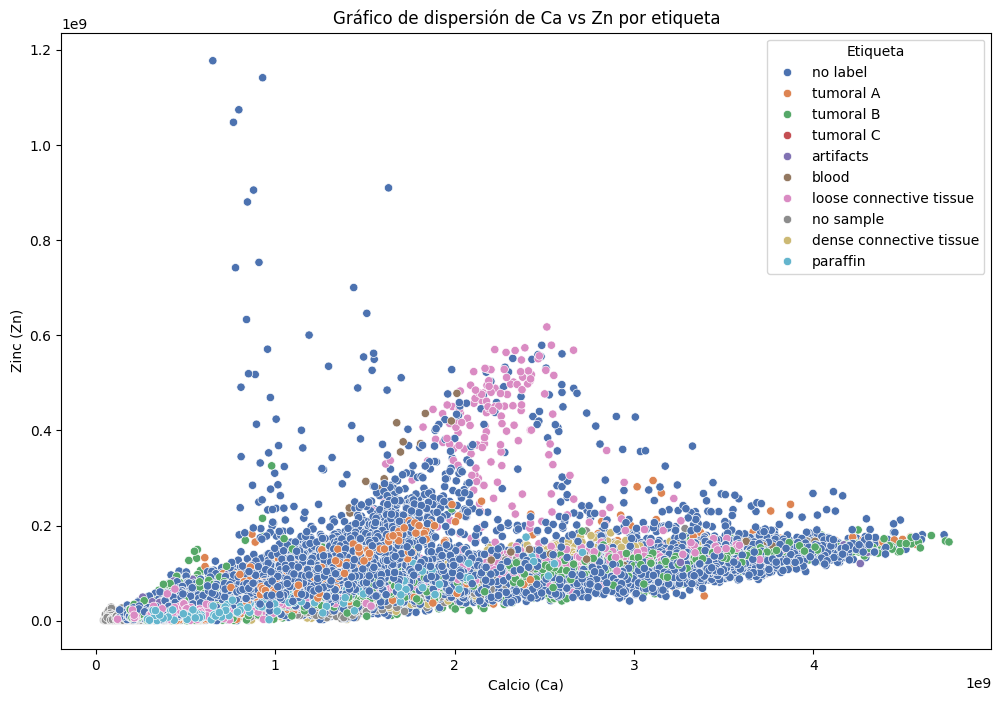

In [ ]:
# Gráfico de dispersión de las variables de interés
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df[(df['Ca']>0)&(df['Zn']>0)][['diet_name','Ca','label_name','Zn']].dropna(), x='Ca', y='Zn', hue='label_name', palette='deep')
plt.title('Gráfico de dispersión de Ca vs Zn por etiqueta')
plt.xlabel('Calcio (Ca)')
plt.ylabel('Zinc (Zn)')
plt.legend(title='Etiqueta', loc='upper right')
plt.show()

/var/folders/9x/sk5wzh9n465bsgp0vntddj3w0000gn/T/ipykernel_20501/639265463.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_Ca_by_label = df_label_Ca[df_label_Ca['label_name'].isin(labels_interesting)].groupby(['diet_name','label_name'])['Ca'].mean().reset_index()


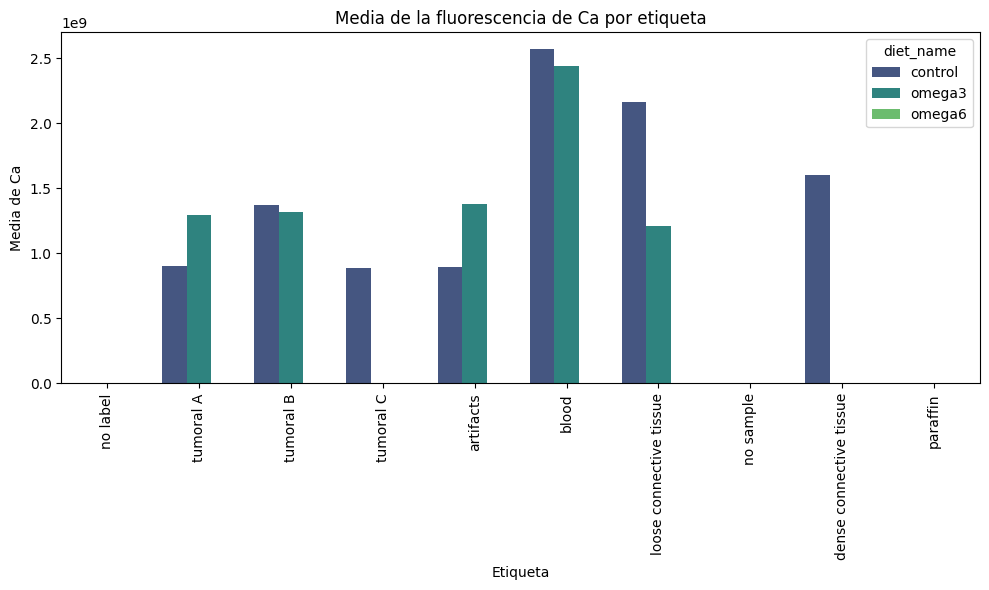

In [38]:
# Gráfico de la media de la fluorescencia de Ca para cada label de interés
mean_Ca_by_label = df_label_Ca[df_label_Ca['label_name'].isin(labels_interesting)].groupby(['diet_name','label_name'])['Ca'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_Ca_by_label['label_name'], y=mean_Ca_by_label['Ca'], hue=mean_Ca_by_label['diet_name'], palette='viridis')
plt.title('Media de la fluorescencia de Ca por etiqueta')
plt.xlabel('Etiqueta')
plt.ylabel('Media de Ca')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [36]:
df_grouped = df[['label','diet','Ca','Cu','Fe','K','Mn','P','S','Zn']].groupby(['diet', 'label']).mean().reset_index()
df_grouped.dropna(inplace=True)
df_grouped

/var/folders/9x/sk5wzh9n465bsgp0vntddj3w0000gn/T/ipykernel_25473/2715755745.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df[['label','diet','Ca','Cu','Fe','K','Mn','P','S','Zn']].groupby(['diet', 'label']).mean().reset_index()


,diet,label,Ca,Cu,Fe,K,Mn,P,S,Zn
0,0,0.0,1.652778e+09,1.012637e+07,9.917775e+07,6.134488e+06,6.665419e+06,9.376277e+06,2.805938e+07,7.341941e+07
1,0,2.0,9.057152e+08,6.380941e+06,5.043783e+07,1.065482e+07,5.976961e+06,4.888040e+06,1.960983e+07,4.794745e+07
2,0,3.0,1.367009e+09,9.376398e+06,8.170487e+07,1.401776e+07,7.132672e+06,1.038569e+07,2.881856e+07,6.148935e+07
3,0,4.0,8.904235e+08,5.866324e+06,3.316459e+07,0.000000e+00,6.748958e+05,6.712198e+06,1.366240e+07,2.854937e+07
4,0,5.0,8.934122e+08,7.350803e+06,5.828194e+07,1.231090e+07,6.437651e+06,4.647193e+06,1.938224e+07,4.806743e+07
5,0,6.0,2.569411e+09,1.396495e+07,1.474238e+08,0.000000e+00,6.789188e+06,1.332339e+07,3.503295e+07,1.309950e+08
6,0,7.0,2.166414e+09,1.235333e+07,2.390962e+08,4.487432e+06,7.517239e+06,4.824207e+06,3.738835e+07,1.641041e+08
7,0,8.0,6.493736e+08,4.597176e+06,7.413265e+07,5.661903e+04,1.337719e+07,2.114739e+06,5.644806e+06,2.174781e+07
8,0,9.0,1.601959e+09,8.637674e+06,1.294304e+08,0.000000e+00,1.323197e+07,2.311730e+05,2.329794e+07,6.709734e+07
10,1,0.0,1.346731e+09,1.297930e+07,1.924465e+08,3.246299e+07,2.277791e+07,1.454717e+07,5.293195e+07,1.321329e+08
